<a href="https://colab.research.google.com/github/eric-pding/RSM8413_Group_Assignments/blob/main/RSM8413_Group_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSM8413 Group Assignment 3

# Importing Libraries

In [ ]:
!pip install scikeras

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
# Reading in the dataset
train = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/USCensusTraining.csv'
test = 'https://raw.githubusercontent.com/eric-pding/RSM8413_Group_Assignments/main/USCensusTest.csv'
data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25000 non-null  int64 
 1   workclass       25000 non-null  object
 2   demogweight     25000 non-null  int64 
 3   education       25000 non-null  object
 4   education-num   25000 non-null  int64 
 5   marital-status  25000 non-null  object
 6   occupation      25000 non-null  object
 7   relationship    25000 non-null  object
 8   race            25000 non-null  object
 9   sex             25000 non-null  object
 10  capital-gain    25000 non-null  int64 
 11  capital-loss    25000 non-null  int64 
 12  hours-per-week  25000 non-null  int64 
 13  native-country  25000 non-null  object
 14  income          25000 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.9+ MB


,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [ ]:
data_test.info()
data_test.head()
data_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7561 entries, 0 to 7560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             7561 non-null   int64 
 1   workclass       7561 non-null   object
 2   demogweight     7561 non-null   int64 
 3   education       7561 non-null   object
 4   education-num   7561 non-null   int64 
 5   marital-status  7561 non-null   object
 6   occupation      7561 non-null   object
 7   relationship    7561 non-null   object
 8   race            7561 non-null   object
 9   sex             7561 non-null   object
 10  capital-gain    7561 non-null   int64 
 11  capital-loss    7561 non-null   int64 
 12  hours-per-week  7561 non-null   int64 
 13  native-country  7561 non-null   object
dtypes: int64(6), object(8)
memory usage: 827.1+ KB


(7561, 14)

## EDA: Education


In [53]:
data_train['education'].unique()
edu_level = ['Preschool','1st-4th','5th-6th', '7th-8th','9th','10th','11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors', 'Masters','Prof-school','Doctorate']
data_train['education-level'] = pd.Categorical(data_train['education'], categories=edu_level, ordered=True)

In [54]:
# Cross-Tabulate
pd.crosstab(index=data_train['education-level'], columns=data_train['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education-level,,,,,,,,,,,,,,,,
Preschool,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1st-4th,0,120,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,244,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,491,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,394,0,0,0,0,0,0,0,0,0,0,0
10th,0,0,0,0,0,721,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,909,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,323,0,0,0,0,0,0,0,0
HS-grad,0,0,0,0,0,0,0,0,8120,0,0,0,0,0,0,0


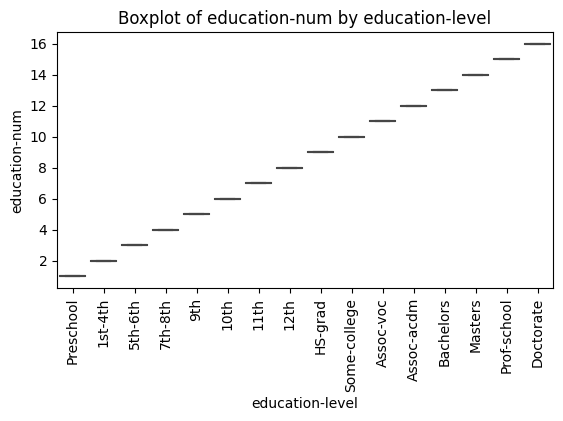

In [55]:
# Using Boxplot - no outlier - the relationship is one-on-one
plt.gca().set_aspect(0.5)
plt.xticks(rotation=90)
sns.boxplot(x='education-level', y='education-num', data=data_train)
plt.title('Boxplot of education-num by education-level')

plt.show()

Background chart from US Census Gov:

https://data.census.gov/vizwidget?g=010XX00US&infoSection=Educational Attainment



In [56]:
from IPython.display import HTML

# HTML content to be embedded
html_content = """



    Embedded HTML





"""

# Display the HTML content
display(HTML(html_content))

We can see that the relationship between education attainment level and the education-num are one-on-one relationship, therefore, we can safely take out one of them.

# Prepoccessing

In [68]:
# Getting dummy variables for the categorical variables for the training set
data_train = pd.read_csv(train)
data_test = pd.read_csv(test)

data_train = data_train.drop(columns = ['education'])
data_train = pd.get_dummies(data_train, columns = ['workclass', 'marital-status', 'occupation',
                                                   'relationship', 'race', 'sex',
                                                   'native-country'])
data_train = pd.get_dummies(data_train, columns = ['income'], drop_first= True)

In [69]:
data_train.head()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K.
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data_train.describe()

,age,demogweight,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K.
count,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,...,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,38.606920,1.897418e+05,10.081440,1088.579040,86.49992,40.407440,0.055960,0.030000,0.06496,0.000200,...,0.00384,0.000360,0.002560,0.001680,0.000600,0.000480,0.896840,0.002000,0.000440,0.239360
std,13.687769,1.052947e+05,2.557035,7486.621197,401.25358,12.299267,0.229849,0.170591,0.24646,0.014141,...,0.06185,0.018971,0.050533,0.040954,0.024488,0.021904,0.304174,0.044678,0.020972,0.426701
min,17.000000,1.228500e+04,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.00000,40.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.00000,40.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.000000,2.368610e+05,12.000000,0.000000,0.00000,45.000000,0.000000,0.000000,0.00000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.00000,99.000000,1.000000,1.000000,1.00000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
# Scaling the data
scaler = preprocessing.MinMaxScaler()
scaled_data_train = scaler.fit_transform(data_train)
scaled_data_train

array([[0.30136986, 0.0443019 , 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.45205479, 0.0482376 , 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.28767123, 0.13811345, 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21917808, 0.1808105 , 0.53333333, ..., 0.        , 0.        ,
        0.        ],
       [0.05479452, 0.28595442, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.10958904, 0.16713574, 0.8       , ..., 0.        , 0.        ,
        0.        ]])

In [72]:
# Making the array back into a dataframe
pd.DataFrame(scaled_data_train).describe()

scaled_data_train.shape

(25000, 93)

In [73]:
# Defining X_train and y_train
X_train = scaled_data_train[:, :92]
y_train = scaled_data_train[:, 92]


In [75]:
# Building the Neural Network
model = Sequential()

# Adding the layers
model.add(Dense(14, input_shape = (92,), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

# Fitting the model on the training data
model.fit(X_train, y_train, epochs = 50, batch_size = 10)

Epoch 1/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.4001 - accuracy: 0.8112
Epoch 2/50
2500/2500 [==============================] - 7s 3ms/step - loss: 0.3611 - accuracy: 0.8292
Epoch 3/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3536 - accuracy: 0.8349
Epoch 4/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3486 - accuracy: 0.8376
Epoch 5/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3447 - accuracy: 0.8398
Epoch 6/50
2500/2500 [==============================] - 6s 2ms/step - loss: 0.3419 - accuracy: 0.8413
Epoch 7/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.3395 - accuracy: 0.8419
Epoch 8/50
2500/2500 [==============================] - 5s 2ms/step - loss: 0.3377 - accuracy: 0.8432
Epoch 9/50
2500/2500 [==============================] - 6s 3ms/step - loss: 0.3364 - accuracy: 0.8450
Epoch 10/50
2500/2500 [==============================] - 4s 2ms/step - loss: 0.335

In [76]:
predictions = model.predict(X_train)
rounded = [round(x[0]) for x in predictions]
print(rounded)

782/782 [==============================] - 1s 1ms/step
[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

# Shuya

In [77]:
# Perform the permutation feature importance on the training data
#Import librariers
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
#Find the model accuracy of our original model
mod_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
#Shuffle each signle featuer to find the deature importance
feature_importance = {}
for i in range(X_train.shape[1]):
  test=X_train.copy()
  np.random.shuffle(test[:,i])
  shffled_accuracy=model.evaluate(test, y_train, verbose=0)[1]
  feature_importance[i]=mod_accuracy-shffled_accuracy
#Sorting the featur importance in decending prder
sorted_importance=sorted(feature_importance.items(),key=lambda x:x[1],reverse=True)
print(sorted_importance)

[(19, 0.10672003030776978), (15, 0.07860004901885986), (38, 0.05248004198074341), (17, 0.05044001340866089), (37, 0.04508000612258911), (25, 0.042840003967285156), (23, 0.03088003396987915), (2, 0.029360055923461914), (30, 0.02724003791809082), (32, 0.02492004632949829), (3, 0.024840056896209717), (34, 0.024840056896209717), (40, 0.02456003427505493), (29, 0.022680044174194336), (36, 0.020560026168823242), (26, 0.020400047302246094), (41, 0.020280003547668457), (21, 0.01756000518798828), (20, 0.016920030117034912), (27, 0.01428002119064331), (28, 0.013040006160736084), (35, 0.007160007953643799), (18, 0.006640017032623291), (0, 0.006400048732757568), (5, 0.005720019340515137), (39, 0.005480051040649414), (33, 0.005440056324005127), (6, 0.004920005798339844), (22, 0.004800021648406982), (42, 0.004120051860809326), (4, 0.003320038318634033), (49, 0.002160012722015381), (1, 0.0019600391387939453), (31, 0.0014400482177734375), (47, 0.0012400150299072266), (11, 0.0011600255966186523), (12, 

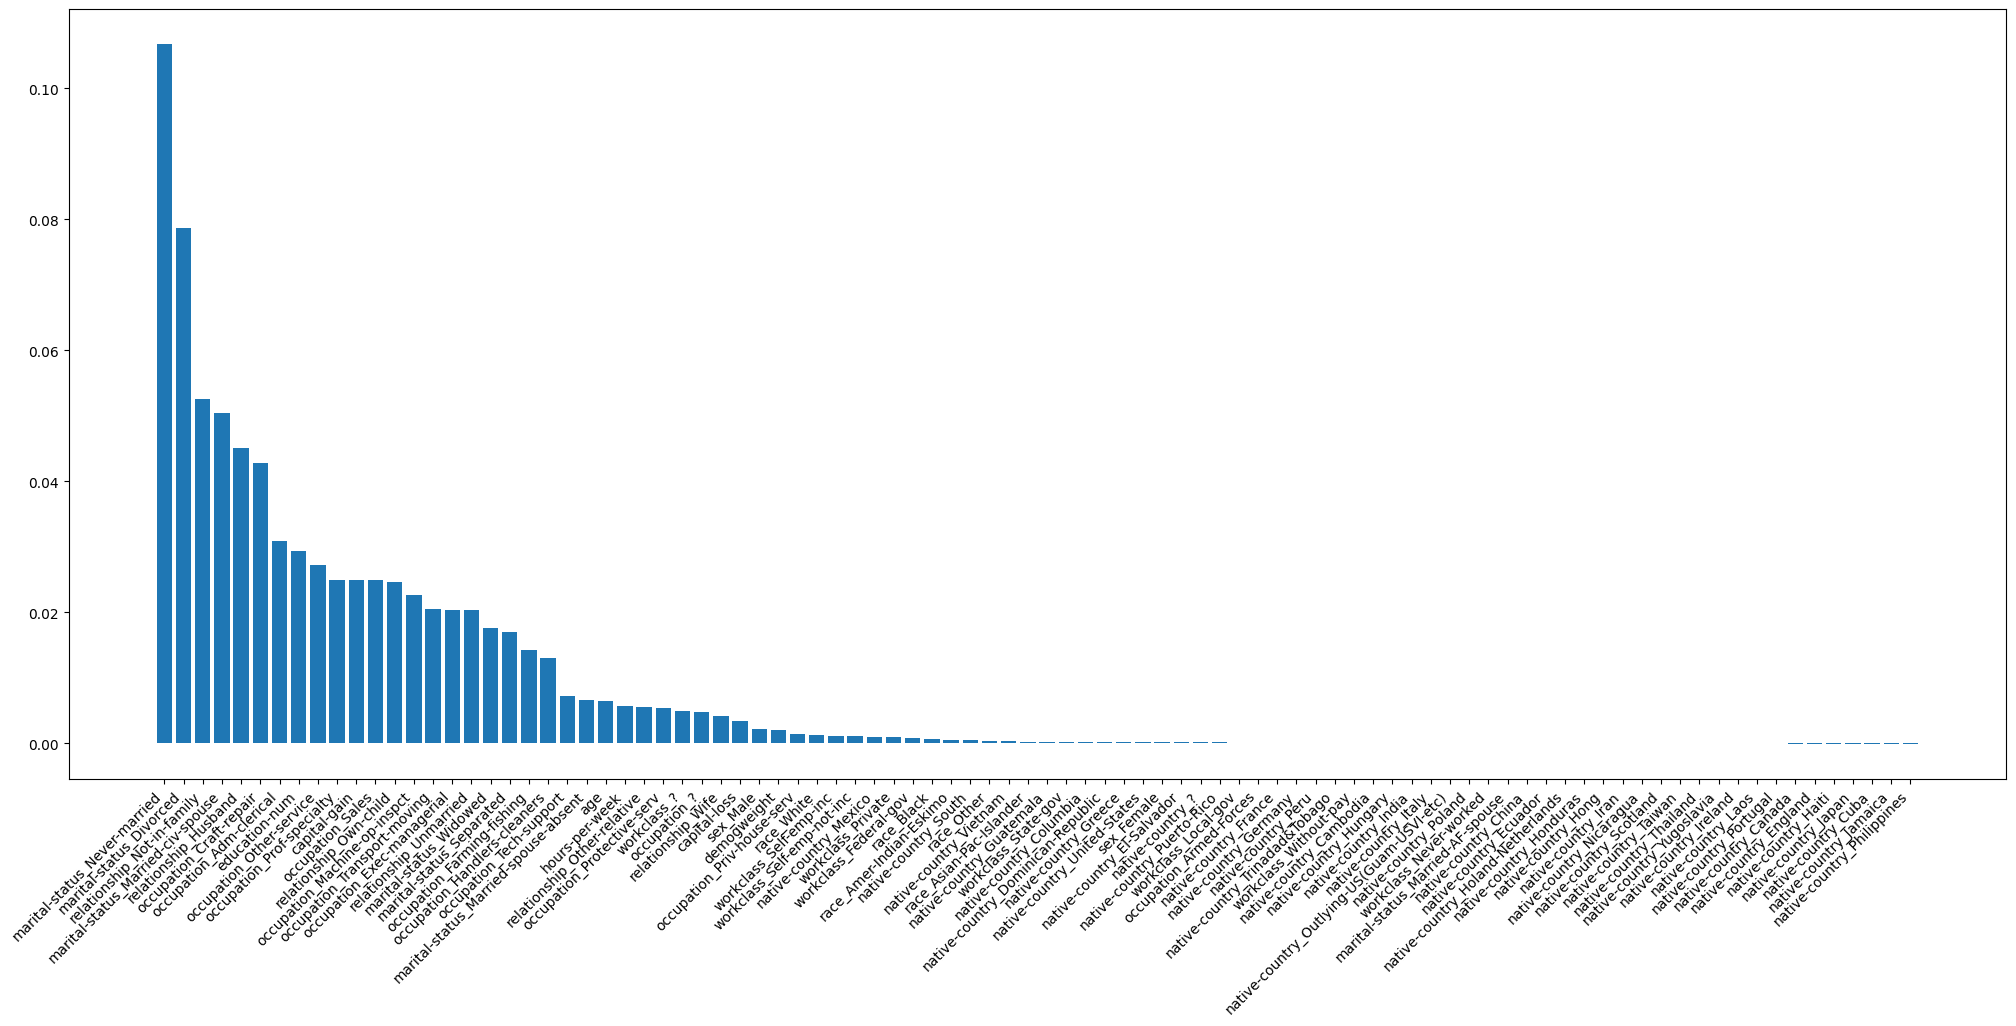

In [78]:
#Show the feature importance together with the feature name in a bar plot
features= [item[0] for item in sorted_importance]
feature_names = data_train.columns[:-1]
index_to_name = {i: name for i, name in enumerate(feature_names)}
named_features = [index_to_name[idx] for idx in features]
importance = [item[1] for item in sorted_importance]
plt.figure(figsize=(25, 10))
plt.xticks(rotation=45, ha="right")
plt.bar(named_features, importance)
plt.show()

In [79]:
#Predicted accuracyg
mod_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
print(mod_accuracy)

0.8526800274848938


# Rishik

In [ ]:
compare = pd.DataFrame({'predicted': rounded, 'actual': y_train}, columns = ['predicted', 'actual'])
compare

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_train, rounded)
confusion_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
confusion_display.plot()

# Eric



## Question 1e

e. Which occupations are associated with predicted income over $50,000? Which education levels? Which ages? Is this intuitive? Construct graphs of the top three categorical predictors, and their relationship to predicted income. Make sure you fine-tune these graphs, and arrange the graphs so that they are truly helpful.

## EDA - capital gain and loss

We can see that capital gain and capital loss will not appear together.
However, neural network may assign diffrent weights to capital gain and capital loss, therefore we can choose to combine or not combine.

<Axes: xlabel='capital-gain', ylabel='capital-loss'>

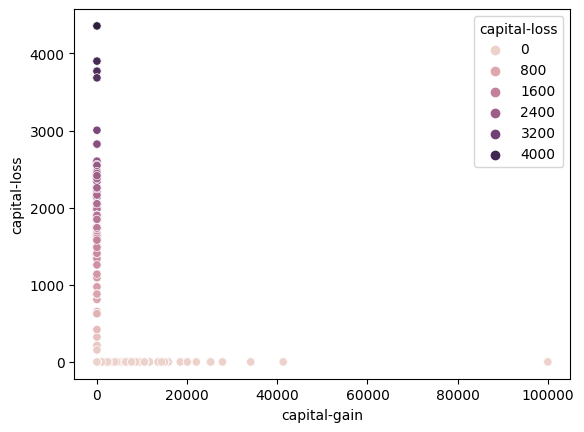

In [30]:
sns.scatterplot(x= data_train['capital-gain'], y = data_train['capital-loss'], hue = data_train['capital-loss'])

In [61]:
# Covert 0/1 variable
data_train = pd.read_csv(train)

data_train['income'].unique()
data_train['50k'] = data_train['income'].map({'<=50K.':0, '>50K.':1})

## Explore Education

In [62]:
# Cross-Tabulate
df_edu_inc = pd.crosstab(index=data_train['education-num'], columns=data_train['income'])
df_edu_inc['pct_50k'] =  df_edu_inc['>50K.'] /df_edu_inc.sum(axis=1) * 100
df_edu_inc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1 to 16
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   <=50K.   16 non-null     int64  
 1   >50K.    16 non-null     int64  
 2   pct_50k  16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 512.0 bytes


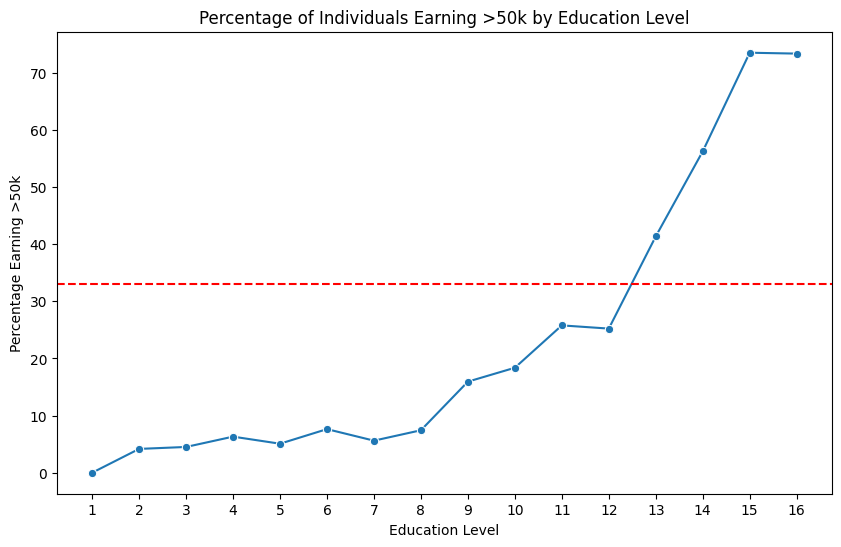

In [63]:
# Plot the Relationship
plt.figure(figsize=(10, 6))
sns.lineplot(x='education-num', y='pct_50k', data=df_edu_inc, marker='o')
plt.xticks(data_train['education-num'].unique()) #show every number
plt.xlabel('Education Level')
plt.ylabel('Percentage Earning >50k')
plt.title('Percentage of Individuals Earning >50k by Education Level')
plt.axhline(y=33, color='red', linestyle='--', label='50% Threshold')

plt.show()

Conclusion: When one's education is 'Baechelors','Masters','Prof-school', or 'Doctorate', one is more likely to have $50k+ income than others who don't. It's in line with expectation: a more advanced degree will normally brings more income.

[Cut off level is 33%]

## Explore Age

In [64]:
# Create bins according to 10s
bins = range(10, data_train['age'].max() + 10, 10)
# Bin the age column
data_train['age-bin'] = pd.cut(data_train['age'], bins=bins, right=False)
# Cross-Tabulate
df_age_inc = pd.DataFrame(pd.crosstab(index=data_train['age-bin'], columns=data_train['income']))
df_age_inc['pct_50k'] =  df_age_inc['>50K.'] /df_age_inc.sum(axis=1) * 100

# Check binning result
df_age_inc

# Calculate the mean percentage for each bin
# df_binned = df_edu_inc.groupby('education_bin')['pct_50k'].mean().reset_index()

income,<=50K.,>50K.,pct_50k
age-bin,,,
"[10, 20)",1255,2,0.159109
"[20, 30)",5814,380,6.134969
"[30, 40)",4821,1778,26.943476
"[40, 50)",3498,2037,36.802168
"[50, 60)",2102,1293,38.085420
"[60, 70)",1102,406,26.923077
"[70, 80)",338,74,17.961165
"[80, 90)",56,7,11.111111


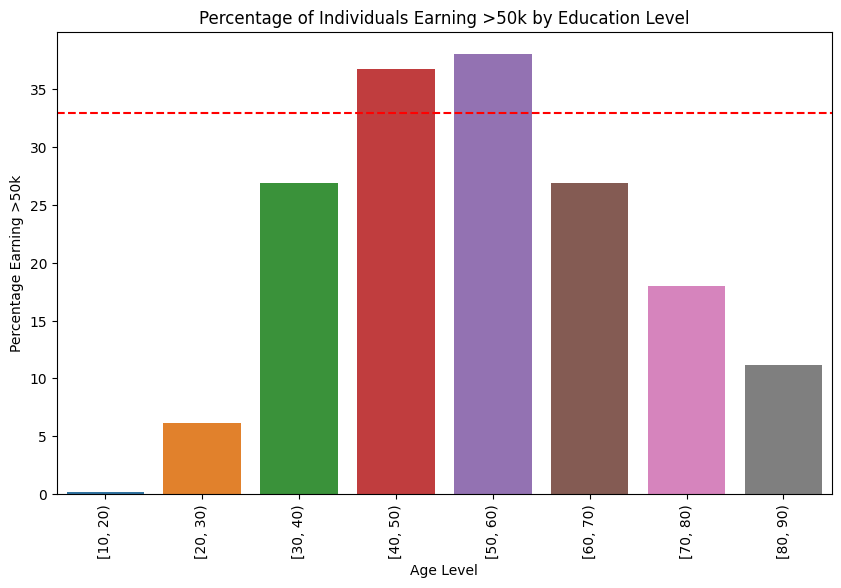

In [65]:
# Plot the Relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=df_age_inc.index.values, y='pct_50k', data=df_age_inc)
plt.xticks(rotation = 90) #show every number
plt.xlabel('Age Level')
plt.ylabel('Percentage Earning >50k')
plt.title('Percentage of Individuals Earning >50k by Education Level')
plt.axhline(y=33, color='red', linestyle='--', label='50% Threshold')

plt.show()

Conclusion: When one's age is between 40 - 60, one is more likely to have $50k+ income than others who is younger or older.

It's in line with expectation: for younger person or retired person, the salary is more unlikely to reach $50k.

[Cut off level is 33%]

## Explore Occupation

In [66]:
# Cross-Tabulate
df_occ_inc = pd.crosstab(index=data_train['occupation'], columns=data_train['income'])
df_occ_inc['pct_50k'] =  df_occ_inc['>50K.'] /df_occ_inc.sum(axis=1) * 100
df_occ_inc = df_occ_inc.sort_values(by= 'pct_50k', ascending= False)
df_occ_inc

income,<=50K.,>50K.,pct_50k
occupation,,,
Exec-managerial,1596,1488,48.249027
Prof-specialty,1758,1422,44.716981
Protective-serv,343,160,31.809145
Tech-support,488,215,30.583215
Sales,2064,751,26.678508
Craft-repair,2419,703,22.517617
Transport-moving,978,250,20.358306
Adm-clerical,2582,393,13.210084
Machine-op-inspct,1348,188,12.239583


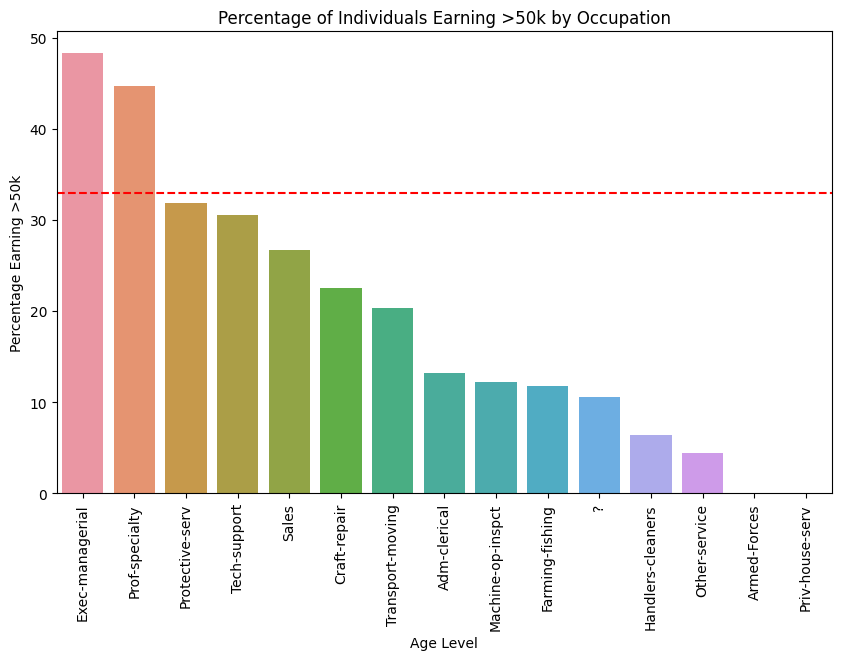

In [67]:
# Plot the Relationship
plt.figure(figsize=(10, 6))
sns.barplot(x=df_occ_inc.index.values, y='pct_50k', data=df_occ_inc)
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Percentage Earning >50k')
plt.title('Percentage of Individuals Earning >50k by Occupation')
plt.axhline(y=33, color='red', linestyle='--', label='50% Threshold')

plt.show()

Conclusion: When one's occupation is "Exec-managerial" or "Prof-specialty" , one is more likely to have $50k+ income than others who works in other professions.

It's in line with expectation: managers and special professionals earn more than other occupations.

[Cut off level is 33%]

# Iris

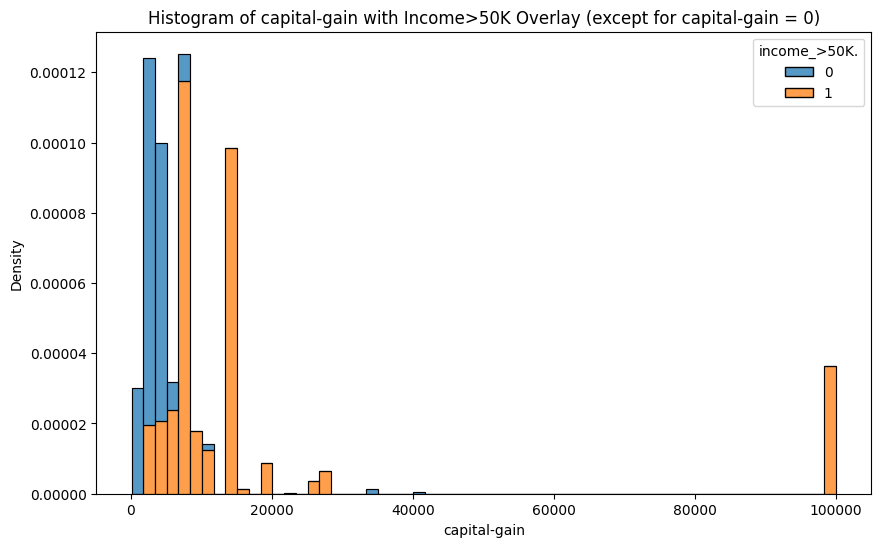

In [28]:
filtered_data = data_train[data_train['capital-gain'] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='capital-gain', hue='income_>50K.', multiple='stack', stat='density', common_norm=True)

plt.title('Histogram of capital-gain with Income>50K Overlay (except for capital-gain = 0)')
plt.xlabel('capital-gain')
plt.ylabel('Density')

plt.show()

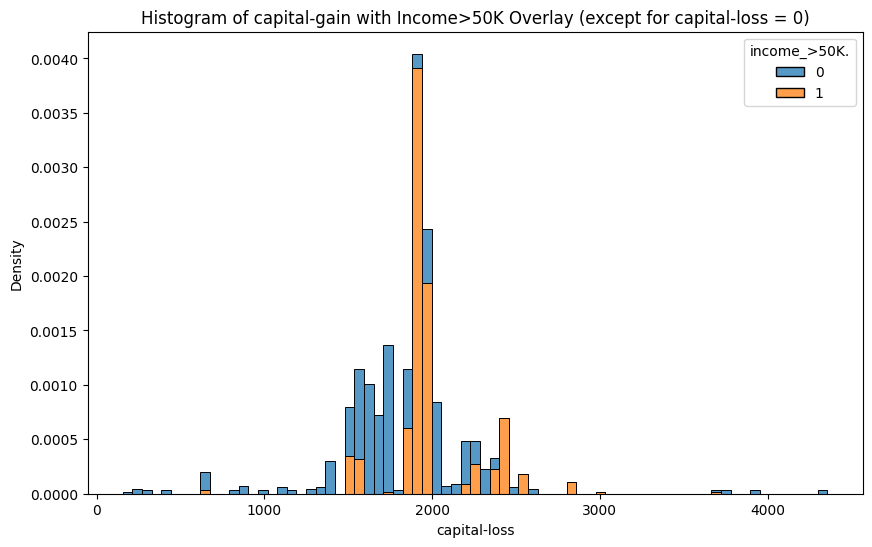

In [29]:
filtered_data = data_train[data_train['capital-loss'] != 0]

plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='capital-loss', hue='income_>50K.', multiple='stack', stat='density', common_norm=True)

plt.title('Histogram of capital-gain with Income>50K Overlay (except for capital-loss = 0)')
plt.xlabel('capital-loss')
plt.ylabel('Density')

plt.show()